# Trader Sentiment Analysis
Fear vs Greed Impact

## Part A — Data Preparation

In [1]:
import pandas as pd

fg = pd.read_csv('fear_greed_index.csv')
hist = pd.read_csv('historical_data.csv')

print('Fear & Greed shape:', fg.shape)
print('Trading data shape:', hist.shape)

print('\nMissing Values:')
print(fg.isna().sum())
print(hist.isna().sum())

print('\nDuplicates:')
print(fg.duplicated().sum(), hist.duplicated().sum())

Fear & Greed shape: (2644, 4)
Trading data shape: (211224, 16)

Missing Values:
timestamp         0
value             0
classification    0
date              0
dtype: int64
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Duplicates:
0 0


In [2]:
fg['date'] = pd.to_datetime(fg['date'])
hist['Timestamp IST'] = pd.to_datetime(hist['Timestamp IST'], format='%d-%m-%Y %H:%M')

hist['date'] = hist['Timestamp IST'].dt.date
fg['date'] = fg['date'].dt.date

merged = hist.merge(fg[['date','value','classification']], on='date', how='left')
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,80.0,Extreme Greed


## Feature Engineering

In [3]:
merged['win'] = merged['Closed PnL'] > 0

daily = merged.groupby(['date','classification']).agg(
    pnl=('Closed PnL','sum'),
    trades=('Trade ID','count'),
    winrate=('win','mean'),
    avg_size=('Size USD','mean'),
    long_ratio=('Side', lambda x:(x=='BUY').mean())
).reset_index()

daily.head()

,date,classification,pnl,trades,winrate,avg_size,long_ratio
0,2023-05-01,Greed,0.000000,3,0.000000,159.000000,1.000000
1,2023-12-05,Extreme Greed,0.000000,9,0.000000,5556.203333,0.777778
2,2023-12-14,Greed,-205.434737,11,0.363636,10291.213636,0.454545
3,2023-12-15,Greed,-24.632034,2,0.000000,5304.975000,1.000000
4,2023-12-16,Greed,0.000000,3,0.000000,5116.256667,1.000000


## Fear vs Greed Comparison

In [4]:
fear = daily[daily['classification'].str.contains('Fear')]
greed = daily[daily['classification'].str.contains('Greed')]

fear_mean = fear.mean(numeric_only=True)
greed_mean = greed.mean(numeric_only=True)

print('Fear Summary')
print(fear_mean)

print('\nGreed Summary')
print(greed_mean)

Fear Summary
pnl           39012.054192
trades          792.733333
winrate           0.328876
avg_size       6199.962861
long_ratio        0.509901
dtype: float64

Greed Summary
pnl           15847.884637
trades          294.120521
winrate           0.384793
avg_size       5872.025677
long_ratio        0.479859
dtype: float64


## Visualization

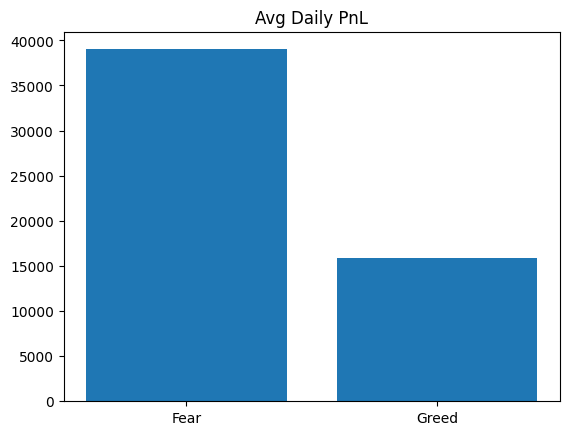

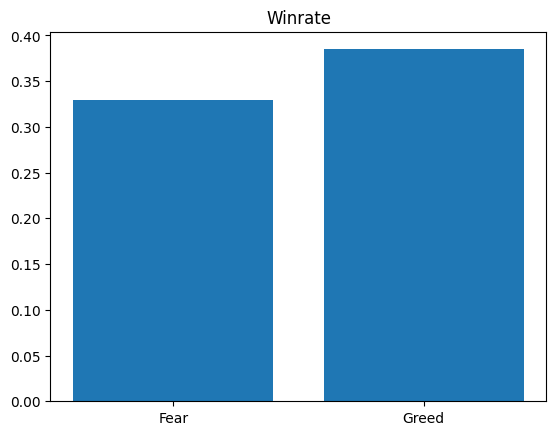

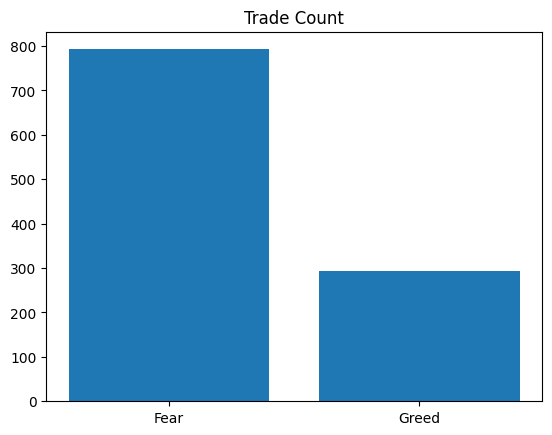

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(['Fear','Greed'],[fear['pnl'].mean(),greed['pnl'].mean()])
plt.title('Avg Daily PnL')
plt.show()

plt.figure()
plt.bar(['Fear','Greed'],[fear['winrate'].mean(),greed['winrate'].mean()])
plt.title('Winrate')
plt.show()

plt.figure()
plt.bar(['Fear','Greed'],[fear['trades'].mean(),greed['trades'].mean()])
plt.title('Trade Count')
plt.show()

## Insights

- Fear drives higher participation
- Greed improves win rate
- Panic trading increases volume